# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [2]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 100

In [3]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [4]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0
message_times = []
my_message_times = []
most_used_words_dict = {}

In [5]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 253 chats...
hrofamily_9pg830ndkw
yashnair_pcimtwzmfa
annikamcdermotthinman_dhemimjzcq
colleenobrien_s3rh4nx_yq
laneelizabethmckenna_bvbzbkw1rw
graceli_z4yvb_roha
joannazhou_oltz8ytlna
ipekkarataylioglu_wwsalbvqiq
laurenwhitaker_2tbjz3suwq
jennalee_aib7jvbdig
lilylansdell_ynrsspudig
susansnyder_ubz6v9lkoq
jenniferalyssaandkarissa_quv5noklwg
alexanderrichardstrausfausto_pi6fxfdyuq
jamesroney__vets53bzq
tessacahoon_gxtsj_nl7q
danielsolowey_1myxp680hq
shiyueteresazhang_zbcffaa2pg
lilyclarke_kbgxct9xbq
pennypackerang_syisyxntbw
lindamirandamcnamara_udhnsptf1w
isaacrobinson_k9jbiqgolg
benjaminjung_j7phkor0_a
cs51_yzxnfcpeyg
alexbynum_gbavc39pyq
gabriellakim_7mwhfljlaw
naphataryacn_l_i4d6x_6q
wormz_wcos1azsqw
katielang_mkpucjso4a
yujiarui_7vf6z547xw
helenbynum_0q0hqj_7pa
zoeyu_d6252-i1fg
ariellanapoli_ykztksf69g
rozimelindsey_-rir6fuivg
hectorcameronjeffersonand4others_vvoppg0mzg
johannabandler_cbcnpv1u1g
julieandalex__azwihh38q
meilingthompson_4dm5ebqgpg
audreyemata_da9xxzb3uw
sop

In [6]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"].split()

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            t = datetime.datetime.fromtimestamp(time/1000.0)
            person_to_times[name].append(t)
            message_times.append(t.hour)

            for word in message_content:
                most_used_words_dict[word] = most_used_words_dict.get(word, 0)
                most_used_words_dict[word] += 1

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

most_used_words = []
for word, occ in most_used_words_dict.items():
    if occ > 200:
        most_used_words.append((word, occ))


def sorter(el):
    return el[1]


most_used_words.sort(key=sorter, reverse=True)
most_used_words = most_used_words[:50]

xWords = []
wordFreq = []

for tpl in most_used_words:
    xWords.append(tpl[0])
    wordFreq.append(tpl[1])

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 58482 messages - groop_64z0h-5j0g
1 - 8914 messages - tah_urg1edmiyq
2 - 6259 messages - saltsistersandbrackishbrother_kty7wbel6g
3 - 2038 messages - grasspethairandanoushka_ckbqbeht_g
4 - 1703 messages - anoushkaalavilli_hce-gesmja
5 - 1412 messages - men_ekznzxqyag
6 - 1275 messages - frand_6hyz6ylxew
7 - 969 messages - sophieellaanoushkaandkate_1oj3cn5qeq
8 - 907 messages - caitlinwestling_ijwbzijzgg
9 - 901 messages - catherinehan_yaj6rwvxyq
10 - 886 messages - wormz_wcos1azsqw
11 - 873 messages - charlotteperkins_swropzfwfq
12 - 845 messages - pennypackerang_syisyxntbw
13 - 833 messages - hanadai_acqpx8_jvq
14 - 645 messages - squalified_zfuhxnl_bw
15 - 498 messages - cs51_yzxnfcpeyg
16 - 496 messages - simonherron_ide5yo2u_a
17 - 482 messages - sophieandariella_4ighhant9w
18 - 473 messages - isabellehall_3rp5cwsocg
19 - 450 messages - hrofamily_9pg830ndkw
20 - 234 messages - juliakim_zsprtwg6ig
21 - 230 messages - carolinetally_a-tkvjwnqw
22 - 221 messages - leighwilson_ofwl7

In [9]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()

def plot_word_occurence(xs, words):
    X = np.arange(len(xs))
    pl.bar(X, xs, align='center',
           width=0.5, color='r', bottom=0.3)
    pl.xticks(X, words, rotation=90)
    pl.title('Frequency of Top 50 words')
    pl.tight_layout()
    pl.show()


def plot_message_times(data):
    pl.xlabel('Time (hr)')
    pl.ylabel('Number of Messages')
    pl.title("# of Messages Over 24 Hours")
    pl.hist(data, 24, alpha=0.3, facecolor=(
        1, 0, 0, 0.5), histtype='stepfilled')
    pl.tight_layout()
    pl.show()

def plot():
    plot_message_times(message_times)
    plot_word_occurence(wordFreq, xWords)

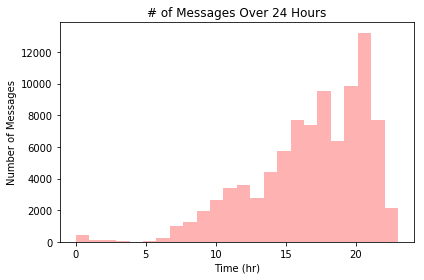

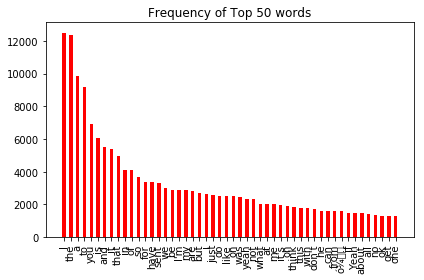

In [10]:
plot()